In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Placement.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
# Replace the NaN values with correct value. And justify why you have chosen the same.
dataset.fillna({"salary":0}, inplace=True)

In [6]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [7]:
# How many of them are not placed?
count=dataset['status'].value_counts()
Pla=count.get('Placed',0)
Npl=count.get('Not Placed',0)

In [8]:
count

status
Placed        148
Not Placed     67
Name: count, dtype: int64

In [9]:
# Find the reason for non placement from the dataset?
Not_placed=dataset[(dataset['status']=='Not Placed') &(dataset['salary'].shape[0])]

In [10]:
Not_placed

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,0.0
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,0.0
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,0.0
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,0.0
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,0.0
201,202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,0.0
206,207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,0.0
208,209,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,0.0


In [11]:
Not_plac=dataset.groupby('status')[["ssc_p", "hsc_p", "degree_p", "etest_p", "mba_p"]].mean()
worker_im = Not_placed["workex"].value_counts(normalize=True) * 100
spec_im = Not_placed["specialisation"].value_counts(normalize=True) * 100

In [12]:
print("Average Scores Comparison:\n", Not_plac)
print("\nWork Experience Impact:\n", worker_im)
print("\nSpecialization Impact:\n", spec_im)

Average Scores Comparison:
                 ssc_p      hsc_p   degree_p    etest_p      mba_p
status                                                           
Not Placed  57.544030  58.395522  61.134179  69.587910  61.612836
Placed      71.721486  69.926554  68.740541  73.238041  62.579392

Work Experience Impact:
 workex
No     85.074627
Yes    14.925373
Name: proportion, dtype: float64

Specialization Impact:
 specialisation
Mkt&HR     62.686567
Mkt&Fin    37.313433
Name: proportion, dtype: float64


In [13]:
dataset.drop("sl_no",axis=1,inplace=True)

In [14]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [15]:
# What kind of relation between salary and mba_p?
dataset.corr(numeric_only=True)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


In [16]:
corr=dataset['mba_p'].corr(dataset['salary'])
print("Correlation between MBA percentage and Salary:", corr)

Correlation between MBA percentage and Salary: 0.13982273892615557


In [17]:
# Which specialization is getting minimum salary?
#groupby().mean()) finds the specialization with the lowest average salary.
specialisation_salary = dataset.groupby('specialisation')['salary'].mean()

In [18]:
specialisation_salary

specialisation
Mkt&Fin    236591.666667
Mkt&HR     150842.105263
Name: salary, dtype: float64

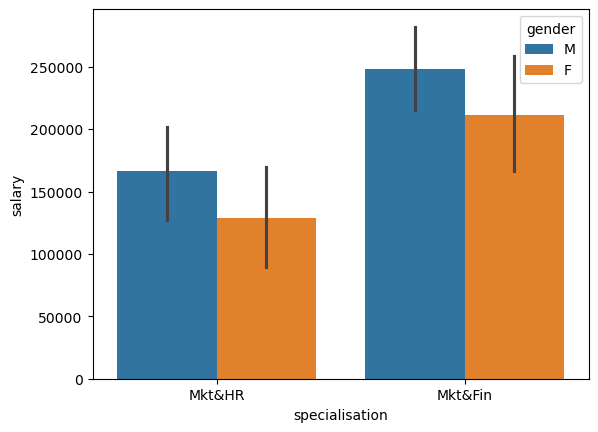

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='specialisation', y="salary", data=dataset, hue='gender')
plt.show()

In [20]:
# Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)
#we going to perform one-way ANOVA
import scipy.stats as stats
stats.f_oneway(dataset['etest_p'],dataset['mba_p'])
#p-<0.05 Accept null hypothesis and reject Alternate hypothesis

F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

In [21]:
# How many of them getting above 500000 salary?
#dataset[dataset['salary'] > 500000] this will filter rows where salary is above 50000
#.shape[0] → will returns the count of such rows.
count_fifty = dataset[dataset['salary'] > 500000].shape[0]
print("Number of people earning above 500000:", count_fifty)

Number of people earning above 500000: 3


In [22]:
#Test the similarity between the degree_t(Sci&Tech) and specialisation( Mkt&HR) with respect to salary at
#significance level of 5%.(Make decision using Hypothesis Testing)
from scipy.stats import ttest_ind
sts=dataset[dataset['degree_t']=='Sci&Tech']['salary']
mhs= dataset[dataset['specialisation']=='Mkt&HR']['mba_p']
ttest_ind(sts,mhs)

TtestResult(statistic=12.70000068269685, pvalue=1.2023450514388486e-25, df=152.0)

In [ ]:
#p-<0.05 Accept null hypothesis and reject Alternate hypothesis

In [23]:
#Convert the normal distribution to standard normal distribution for salary column
def stdBgragh(dataset):
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    values=[i for i in dataset]
    z_score=[((j-mean)/std) for j in values]
    sns.distplot(z_score, kde=True)
    sum(z_score)/len(z_score)

C:\Users\Bagirathan\AppData\Local\Temp\ipykernel_18032\63803373.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score, kde=True)


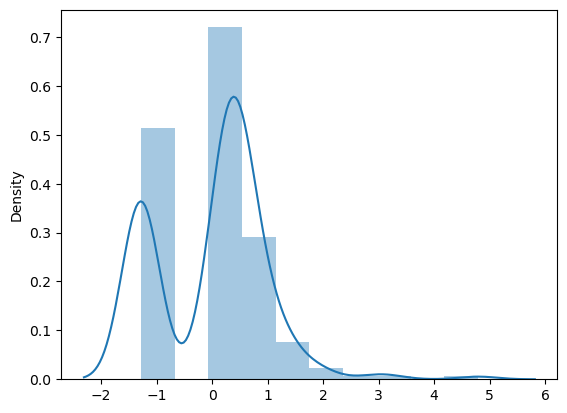

In [24]:
stdBgragh(dataset['salary'])

In [25]:
# What is the probability Density Function of the salary range from 700000 to 900000?
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    #giving dataset and kernel true and giving color for the same
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'red'},color='Yellow')
    # this is to represent the line color
    pyplot.axvline(startrange,color='blue')
    pyplot.axvline(endrange,color='blue')
    #generating sample dataset
    sample=dataset
    # calculating mean and std 
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean,sample_std))
    # defining the distribution
    dist=norm(sample_mean,sample_std)
    # creating a list with range and parameter will be taken form end user
    values=[value for value in range(startrange,endrange)]
    #created list is passed on default in built function to the distribution of the probabilities
    probabilities=[dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

C:\Users\Bagirathan\AppData\Local\Temp\ipykernel_18032\1524509836.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dataset,kde=True,kde_kws={'color':'red'},color='Yellow')


Mean=198702.326, Standard Deviation=154780.927
The area between range(70000,90000):0.038404601457347344


0.038404601457347344

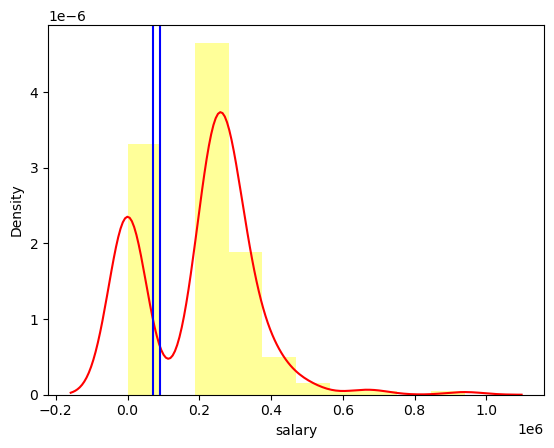

In [26]:
get_pdf_probability(dataset["salary"],70000,90000)

In [27]:
#Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at
#significance level of 5%.(Make decision using Hypothesis Testing)
from scipy.stats import ttest_rel
etest=dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
mba=dataset[dataset['degree_t']=='Sci&Tech']['mba_p']
ttest_rel(etest,mba)

TtestResult(statistic=5.0049844583693615, pvalue=5.517920600505392e-06, df=58)

In [ ]:
#p-<0.05 Accept null hypothesis and reject Alternate hypothesis

In [28]:
# Which parameter is highly correlated with salary?
corr_matrix = dataset.corr(numeric_only=True)
salary_corr = corr_matrix["salary"].drop("salary")
most_corr_param = salary_corr.idxmax()
highest_corr_value = salary_corr.max()
print("Most correlated parameter with salary:", most_corr_param)
print("Correlation coefficient:", highest_corr_value)

Most correlated parameter with salary: ssc_p
Correlation coefficient: 0.5380897133485509


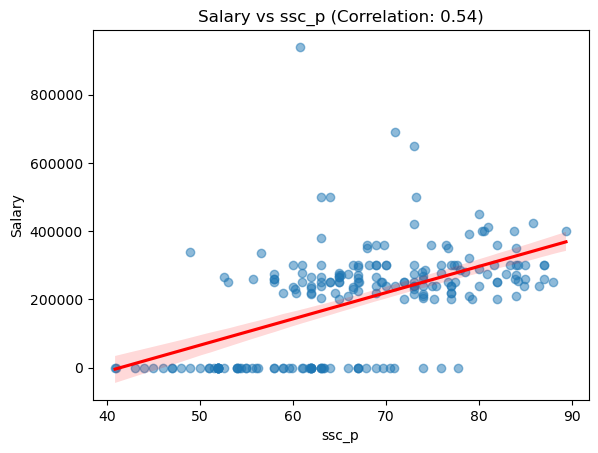

In [29]:
#plot any useful graph and explain it.
sns.regplot(x=dataset[most_corr_param], y=dataset["salary"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel(most_corr_param)
plt.ylabel("Salary")
plt.title(f"Salary vs {most_corr_param} (Correlation: {highest_corr_value:.2f})")
plt.show()
